In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [11]:
(x_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [42]:
x_train=x_train/255
X_test=X_test/255

In [15]:
x_train[0].shape

(28, 28)

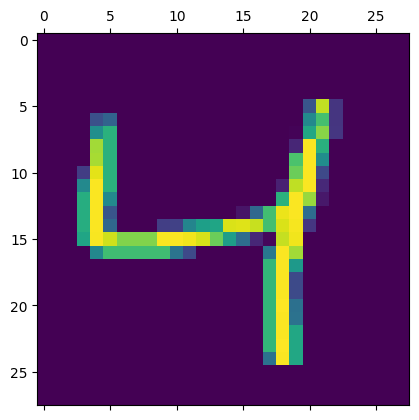

In [21]:
plt.matshow(x_train[2])


In [27]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [45]:
x_train.shape

(60000, 28, 28)

In [44]:
X_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=X_test.reshape(len(X_test),28*28)

In [38]:
X_train_flattened.shape

(60000, 784)

In [37]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [73]:
model=keras.Sequential(
    [
        keras.layers.Dense(100,input_shape=(784,),activation='relu'), #hiddenlayer
        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') #inputlayer 
    ])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8722 - loss: 0.4454
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9606 - loss: 0.1329
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9738 - loss: 0.0872
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9812 - loss: 0.0625
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9850 - loss: 0.0483


In [76]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9695 - loss: 0.0929


[0.07811425626277924, 0.9747999906539917]

In [75]:
model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[6.32908791e-02, 1.16474503e-05, 1.79641142e-01, ...,
        9.99971032e-01, 9.55805834e-03, 7.94455633e-02],
       [7.89654180e-02, 9.65026140e-01, 9.99998033e-01, ...,
        2.18043017e-04, 6.49950147e-01, 1.17929266e-08],
       [3.45472625e-04, 9.96468246e-01, 4.22888100e-02, ...,
        7.14629516e-02, 4.57734793e-01, 2.05164542e-03],
       ...,
       [5.09656347e-05, 4.14115697e-04, 1.27816829e-05, ...,
        1.49081439e-01, 7.60500550e-01, 3.83968741e-01],
       [1.65200174e-01, 4.56792855e-04, 6.55959957e-05, ...,
        2.48949556e-03, 9.91710842e-01, 5.52732265e-04],
       [3.79089773e-01, 5.77892606e-05, 2.18048871e-01, ...,
        1.00461775e-05, 3.67039211e-05, 1.35653419e-04]], dtype=float32)

In [74]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([6.3290879e-02, 1.1647450e-05, 1.7964114e-01, 5.9728086e-01,
       4.3069176e-06, 2.2779838e-03, 1.1059091e-06, 9.9997103e-01,
       9.5580583e-03, 7.9445563e-02], dtype=float32)

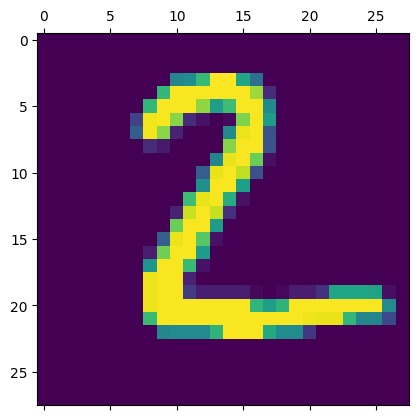

In [77]:
y_predicted_img_matrix=plt.matshow(X_test[1])


In [78]:
np.argmax(y_predicted[1])

2

In [79]:
y_predicted_lables=[np.argmax(i) for i in y_predicted]
y_predicted_lables[:5]

[7, 2, 1, 0, 4]

In [80]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [81]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    1,    0,    0,    1,    1,    2,    1],
       [   0, 1120,    3,    2,    0,    1,    3,    1,    5,    0],
       [   5,    1, 1009,    2,    1,    1,    2,    5,    6,    0],
       [   0,    0,   11,  983,    0,    2,    2,    5,    7,    0],
       [   3,    0,    3,    1,  952,    0,    4,    2,    1,   16],
       [   3,    1,    0,    5,    0,  875,    2,    2,    4,    0],
       [  10,    3,    3,    1,    3,    2,  931,    0,    5,    0],
       [   1,    5,   14,    3,    2,    0,    0,  996,    4,    3],
       [  11,    0,    2,    1,    3,    5,    1,    4,  947,    0],
       [   3,    4,    0,    8,    7,    5,    0,    8,   13,  961]])>

Text(95.72222222222221, 0.5, 'Truth')

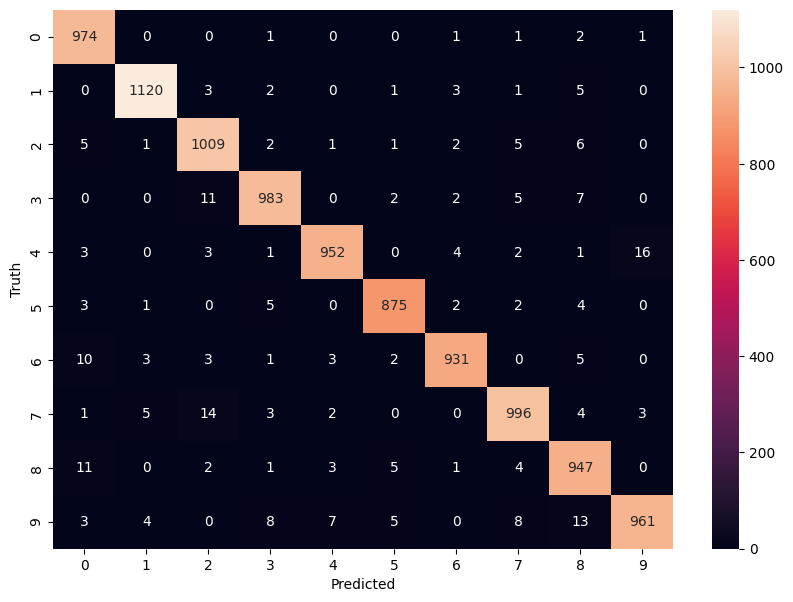

In [82]:
import seaborn as sn 
plt.figure (figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
